<a href="https://colab.research.google.com/github/Pepe2795/Analisis_Resultados_SAT_NYC/blob/main/Exploring_NYC_Public_Schools_Test_Result_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importar pandas
import pandas as pd

#importar csv con base de datos
schools = pd.read_csv("schools.csv")

#preview
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [12]:
#best math schools

bets_math_schools = schools[schools["average_math"]>=800*0.8][["school_name","average_math"]].sort_values(by="average_math",ascending=False)
print(bets_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


In [35]:
#top 10 schools

schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]
top_10 = schools[["school_name","borough", "total_SAT"]].sort_values(by="total_SAT",ascending=False).head(10)
print("----Top 10 schools with highest total_SAT----:\n",top_10)

#top ten schools grouped by their boroughs

top_10_count_borough = top_10.groupby("borough").size().sort_values(ascending=False)
print("\n---Top ten school district distribution---:\n",top_10_count_borough)



----Top 10 schools with highest total_SAT----:
                                            school_name        borough  \
88                              Stuyvesant High School      Manhattan   
170                       Bronx High School of Science          Bronx   
93                 Staten Island Technical High School  Staten Island   
174  High School of American Studies at Lehman College          Bronx   
333                        Townsend Harris High School         Queens   
365  Queens High School for the Sciences at York Co...         Queens   
5                       Bard High School Early College      Manhattan   
280                     Brooklyn Technical High School       Brooklyn   
45                       Eleanor Roosevelt High School      Manhattan   
68   High School for Mathematics, Science, and Engi...      Manhattan   

     total_SAT  
88        2144  
170       2041  
93        2041  
174       2013  
333       1981  
365       1947  
5         1914  
280       18

In [21]:
#Borough with largest std

largest_std_dev = schools.groupby("borough")["total_SAT"].agg(["count","mean","std"]).round(2).sort_values(by="std",ascending=False)


largest_std_dev= largest_std_dev.rename(columns={"count":"num_schools","mean":"average_SAT","std":"std_SAT"})

largest_std_dev.head(1)

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


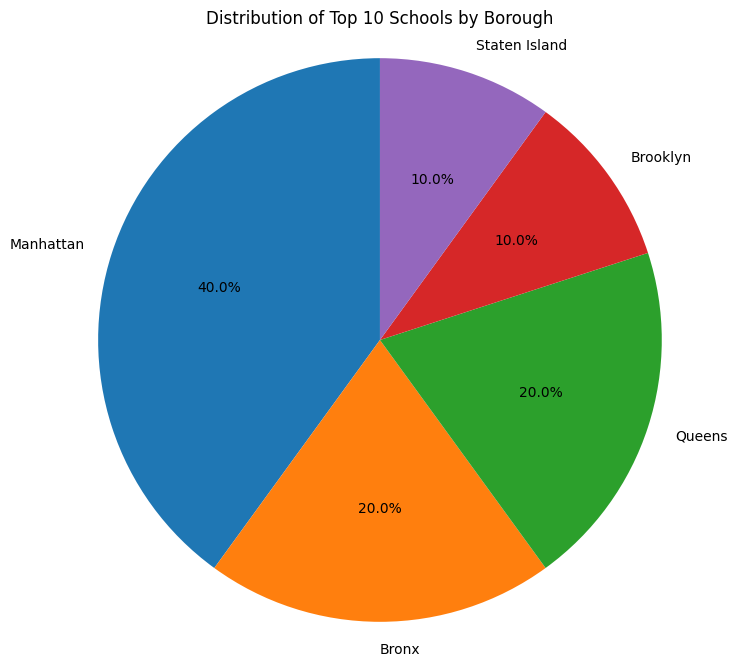

In [38]:
import matplotlib.pyplot as plt

# Create a pie chart from the top_10_count_borough Series
top_10_count_borough.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))

# Add a title
plt.title('Distribution of Top 10 Schools by Borough')

# Ensure the pie chart is circular
plt.axis('equal')

# Show the plot
plt.show()

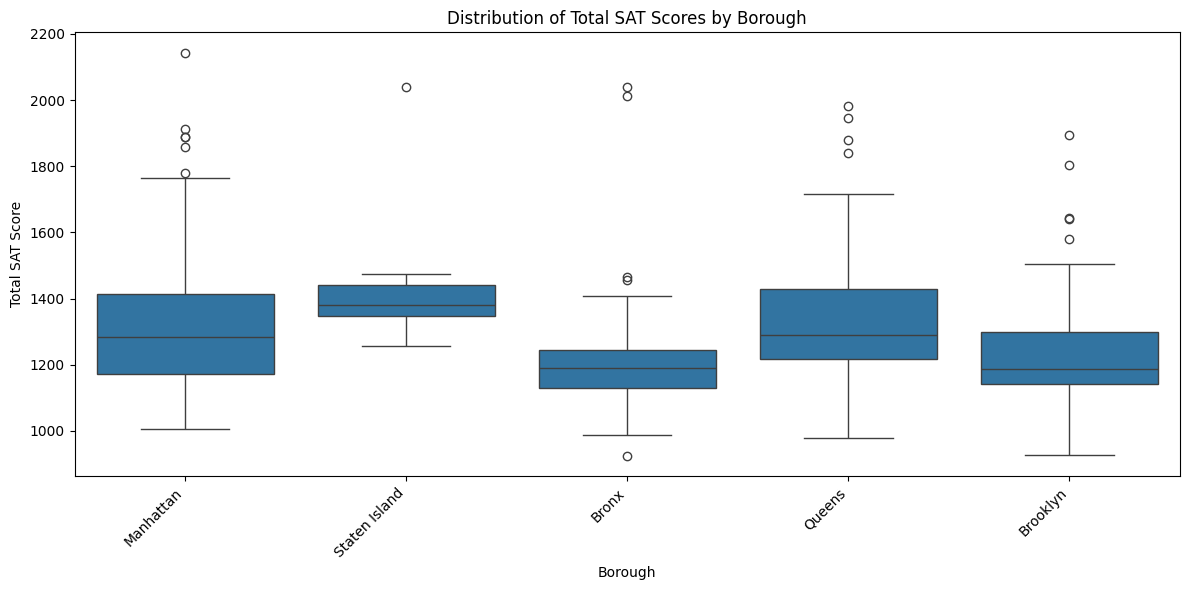

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot of total_SAT scores by borough
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.boxplot(x='borough', y='total_SAT', data=schools)

# Add title and labels
plt.title('Distribution of Total SAT Scores by Borough')
plt.xlabel('Borough')
plt.ylabel('Total SAT Score')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()